In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import statsmodels.formula.api as smf
import time                   # To time processes
import warnings               # To suppress warnings
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



import os                     # For os related operations
import sys                    # For data size
%matplotlib inline
H2015=pd.read_csv('2015.csv')
H2016=pd.read_csv('2016.csv')
H2017=pd.read_csv('2017.csv')

In [2]:
print(H2015.shape,H2016.shape,H2017.shape)

(158, 12) (157, 13) (155, 12)


In [3]:
H2016=H2016.loc[H2016['Country'].isin(H2017['Country'])]
H2015=H2015.loc[H2015['Country'].isin(H2016['Country'])]
H2017=H2017.loc[H2017['Country'].isin(H2015['Country'])]
H2016=H2016.loc[H2016['Country'].isin(H2015['Country'])]

In [4]:
print(H2015.columns,H2016.columns,H2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [5]:
H2017=H2017.merge(H2015.iloc[:,0:2], on='Country', how='left')
H2015=H2015.drop(columns=['Standard Error'])
H2016=H2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'])
H2017=H2017.drop(columns=['Whisker.high','Whisker.low'])

In [6]:
H2015['year']=2015
H2016['year']=2016
H2017['year']=2017

In [7]:
d=({'Country':'Country', 'Happiness Rank':'Happiness Rank', 'Happiness Score':'Happiness Score', 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust', 'Dystopia Residual':'Dystopia Residual','Region':'Region','year':'year',
    'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy','Health..Life.Expectancy.':'Health',
   'Trust..Government.Corruption.':'Trust','Dystopia.Residual':'Dystopia Residual'})
H2015=H2015.rename(columns=d)
H2016=H2016.rename(columns=d)
H2017=H2017.rename(columns=d)

In [8]:
data= H2015.append(H2016, ignore_index=True)
data= data.append(H2017, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [9]:
data

Country  Dystopia Residual   Economy    Family   Freedom  \
0             Switzerland           2.517380  1.396510  1.349510  0.665570   
1                 Iceland           2.702010  1.302320  1.402230  0.628770   
2                 Denmark           2.492040  1.325480  1.360580  0.649380   
3                  Norway           2.465310  1.459000  1.330950  0.669730   
4                  Canada           2.451760  1.326290  1.322610  0.632970   
5                 Finland           2.619550  1.290250  1.318260  0.641690   
6             Netherlands           2.465700  1.329440  1.280170  0.615760   
7                  Sweden           2.371190  1.331710  1.289070  0.659800   
8             New Zealand           2.264250  1.250180  1.319670  0.639380   
9               Australia           2.266460  1.333580  1.309230  0.651240   
10                 Israel           3.088540  1.228570  1.223930  0.413190   
11             Costa Rica           3.177280  0.955780  1.237880  0.633760   
12                Austria           2.533200  1.337230  1.297040  0.624330   
13                 Mexico           3.602140  1.020540  0.914510  0.481810   
14          United States           2.510110  1.394510  1.247110  0.546040   
15                 Brazil           3.260010  0.981240  1.232870  0.490490   
16             Luxembourg           1.969610  1.563910  1.219630  0.615830   
17                Ireland           1.975700  1.335960  1.369480  0.617770   
18                Belgium           2.414840  1.307820  1.285660  0.584500   
19   United Arab Emirates           2.247430  1.427270  1.125750  0.641570   
20         United Kingdom           1.969940  1.266370  1.285480  0.596250   
21              Venezuela           3.191310  1.044240  1.255960  0.429080   
22              Singapore           1.885010  1.521860  1.020000  0.542520   
23                 Panama           2.848480  1.063530  1.198500  0.542100   
24                Germany           2.115690  1.327920  1.299370  0.614770   
25                  Chile           2.675850  1.107150  1.124470  0.441320   
26                  Qatar           1.556740  1.690420  1.078600  0.640400   
27                 France           2.211260  1.277780  1.260380  0.550110   
28              Argentina           2.836000  1.053510  1.248230  0.449740   
29         Czech Republic           2.677820  1.178980  1.206430  0.463640   
..                    ...                ...       ...       ...       ...   
408            Mauritania           1.651637  0.648457  1.272031  0.096098   
409   Congo (Brazzaville)           1.724136  0.808964  0.832044  0.435026   
410               Georgia           1.500138  0.950613  0.570615  0.309410   
411      Congo (Kinshasa)           2.224959  0.092102  1.229023  0.235961   
412                  Mali           1.668191  0.476180  1.281473  0.306614   
413           Ivory Coast           1.844964  0.603049  0.904780  0.447706   
414              Cambodia           1.042941  0.601765  1.006238  0.633376   
415                 Sudan           1.687066  0.659517  1.214009  0.014996   
416                 Ghana           1.577868  0.667225  0.873665  0.423026   
417               Ukraine           0.814382  0.894652  1.394538  0.122975   
418                Uganda           1.526363  0.381431  1.129828  0.443186   
419          Burkina Faso           1.727213  0.350228  1.043280  0.324368   
420                 Niger           1.873983  0.161925  0.993025  0.363659   
421                Malawi           2.081786  0.233442  0.512569  0.466915   
422                  Chad           2.071238  0.438013  0.953856  0.162342   
423              Zimbabwe           1.597970  0.375847  1.083096  0.336384   
424                Angola           1.614482  0.858428  1.104412  0.000000   
425           Afghanistan           2.150801  0.401477  0.581543  0.106180   
426              Botswana           0.377914  1.122094  1.221555  0.505196   
427                 Benin           1.88

## Region analysis

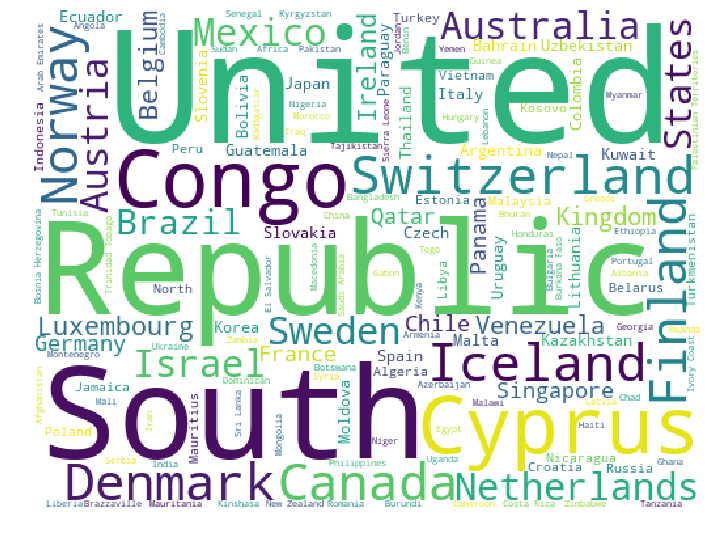

In [10]:
!pip install wordcloud
from wordcloud import WordCloud
x = data['Country']
plt.subplots(figsize=(12,16))
wordcloud = WordCloud(
                          background_color = 'white',
                          width = 512,
                          height = 384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

Above is a wordcloud images including all 146 countries' name. Nothing important here, but it's fancy. LOL!!!

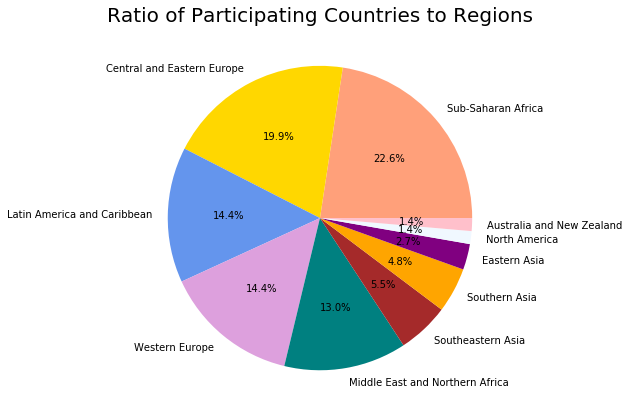

In [11]:
import seaborn as sns
labels = H2017.Region.value_counts().index
colors = ['lightsalmon', 'gold', 'cornflowerblue', 'plum', 'teal', 'brown', 'orange', 'purple', 'aliceblue', 'pink']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sizes = H2017.Region.value_counts().values
plt.style.use('seaborn-pastel')
plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Ratio of Participating Countries to Regions", fontsize = 20)
plt.show()

# 3 Region Analysis

## 3.1 Geometric Distribution of Happiness

In [81]:
d2 = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness Rank'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
layout=go.Layout(autosize=False,width=1000,height=700)
choromap3 = go.Figure(data = [d2], layout=layout)
iplot(choromap3)

This heat map shows the happiness distribution cross 146 countries. 

The darker the orange color, the higher the happiness value. The blank blocks represents missing countries. Apart from the missing countries in our data, countries in Europe are relatively happier. In contrast, several least happy countries widely spread in North America.

We see the geometric positive correlation among happiness level in heat map. In other word, happiness has agglomeration effect. We draw a scatter graph following to empirically show this correlation.

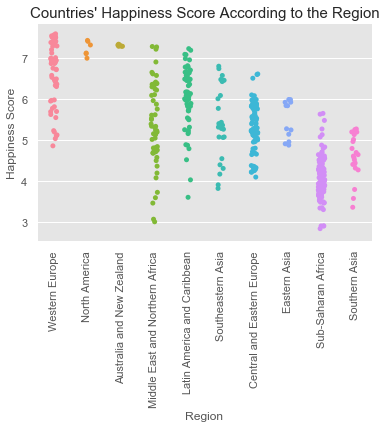

In [83]:
x = sns.stripplot(x ='Region', y = "Happiness Score", data = data, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", fontsize = 15)
plt.show()

In the second scatter graph, it also shows the high probability that relative happier country surrounds with relative happier country, while relative less happy country geometrically close to relative less country. This phenomenon makes sense as countries near each others share more similar social and political status.

In [76]:
data.loc[(data['year']==2017)&(data['Happiness Rank']<50)]['Region'].value_counts()

Western Europe                     17
Latin America and Caribbean        13
Middle East and Northern Africa     6
Central and Eastern Europe          5
Southeastern Asia                   3
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

The dramatic difference among each region also shows when we look into top 50 happy countries. In top 50 happy countries, the number of each region has dramatic difference. For expamle, there are 22 countries in Europe（17 in western Europe, and 5 in Central and Eastern Europe), while only 2 in North America.

## 3.2 Happiness Inequality cross Countries in Europe

Referring to country size and overall happiness level, we choose Europe (Western Europe, and Central and Eastern Europe) be our subject analyzing further in country level.

In [103]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [104]:
Europe=['Western Europe', 'Central and Eastern Europe']
Asia=['Southeastern Asia', 'Eastern Asia','Southern Asia']
Africa=['Middle East and Northern Africa', 'Sub-Saharan Africa']
America_Austrilia_New_Zealand=['North America','Latin America and Caribbean','Australia and New Zealand']

In [105]:
data_E = data[data['Region'].isin(Europe)].groupby('Country', as_index = False)['Happiness Score'].mean()
data_E = data_E.set_index('Country')

Text(0.5, 0, 'Happiness Score')

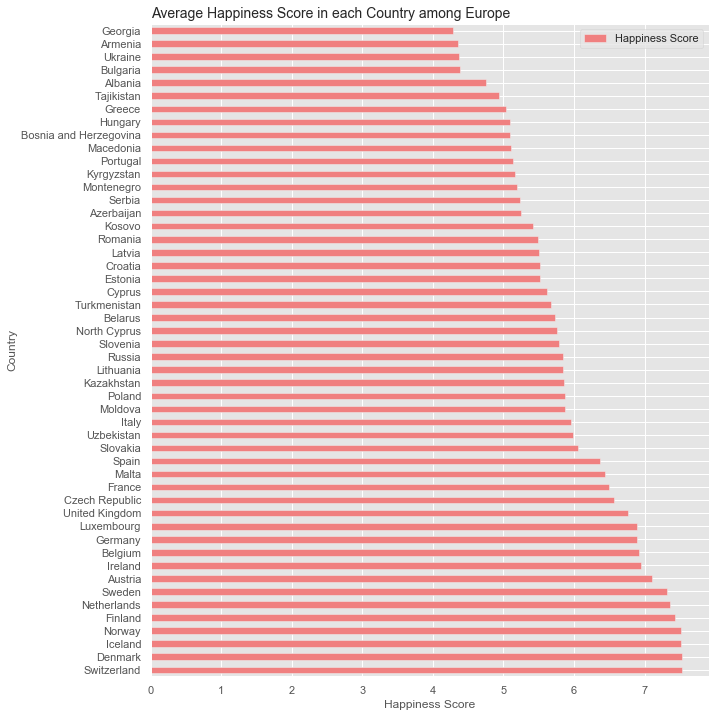

In [106]:
fix, ax = plt.subplots()
data_E.sort_values('Happiness Score', ascending = False).plot(ax = ax, 
                                    kind= 'barh',
                                   color = 'lightcoral',
                                   figsize = (10,12))

ax.set_title('Average Happiness Score in each Country among Europe',fontsize=14, loc = 'left')
ax.set_ylabel('Country')
ax.set_xlabel('Happiness Score')

From the bart charts above, we can see that average happiness score in three years and its ranking in European Countries

Top 5 happest countries in Europe is Switzerland, Denmark, Iceland, Norway and Finland, among which Swiss people feel the happiest. In contrast, 5 least happy countries in Europe is Georgia, Armenia, Ukraine, Bulgaria and Albania, among which Geogia is the lowerest. Although countries in same region may have some similar features, the inequality across the country is in no way futile. Score ranges greatly from above 7 to 4, and we next do a inequality analysis.

In [124]:
data_Europe= data[data['Region'].isin(Europe)][['year','Region','Happiness Score']].groupby(['year','Region']).agg({'Happiness Score':np.std})
data_Europe

Happiness Score
year Region                                     
2015 Central and Eastern Europe         0.570446
     Western Europe                     0.824582
2016 Central and Eastern Europe         0.590395
     Western Europe                     0.789190
2017 Central and Eastern Europe         0.591644
     Western Europe                     0.756891

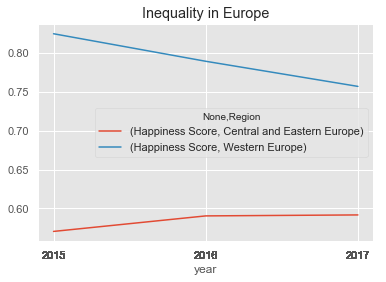

In [137]:
data_Europe.unstack().plot(xticks=(data['year']),title='Inequality in Europe')

This graph shows changing on happiness inequality among countries.

It is interesting that the trend is different in Western Europe and Central and Eastern Europe. Western Europe has higher inequality value in response to Central and Eastern Europe. But inequaility in Western Europe kept decreading from 2015 to 2017, while inequality kept increasing in Central and Eastern Europe. 

## 3.3 Continent Inequality Analysis and Comprison

In this part, we devided regions into five continents: Asia, Europe, America, Africa and Austrilia, among which we focus on Asia and Africa. Our mainly analysis inequlity in each continent .

In [138]:
data_Asia= data[data['Region'].isin(Asia)][['year','Region','Happiness Score']].groupby(['year','Region']).agg({'Happiness Score':np.std})
data_Asia

Happiness Score
year Region                            
2015 Eastern Asia              0.575281
     Southeastern Asia         1.000077
     Southern Asia             0.570526
2016 Eastern Asia              0.484432
     Southeastern Asia         0.977487
     Southern Asia             0.616190
2017 Eastern Asia              0.461573
     Southeastern Asia         0.865941
     Southern Asia             0.499732

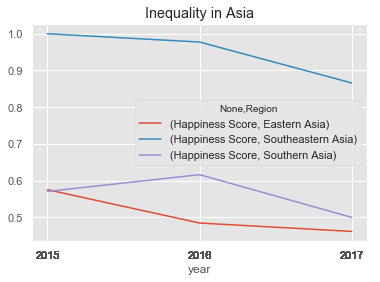

In [139]:
data_Asia.unstack().plot(xticks=(data['year']),title='Inequality in Asia')

This graph shows the inequiality among three regions in Asia. 

It is obvious that inequality is different and it also changed differently in response to different regions. Estern Asia has the higest inequaility level, while Southern Asia is has the lowest. And they both kept decreasing from 2015 to 2017. Southeastern Asia had similar inequality level with Southern Asia in 2015, while the inequality among these two regions was apart in 2016 because inequality increased in Southeastern Asia. Surprisely, the inequality ended up same in 2017.

In [134]:
data_Africa= data[data['Region'].isin(Africa)][['year','Region','Happiness Score']].groupby(['year','Region']).agg({'Happiness Score':np.std})
data_Africa

Happiness Score
year Region                                          
2015 Middle East and Northern Africa         1.076169
     Sub-Saharan Africa                      0.604967
2016 Middle East and Northern Africa         1.057559
     Sub-Saharan Africa                      0.516411
2017 Middle East and Northern Africa         0.985246
     Sub-Saharan Africa                      0.548266

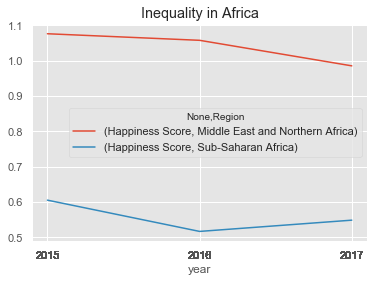

In [140]:
data_Africa.unstack().plot(xticks=(data['year']),title='Inequality in Africa')

This graph shows the inequiality among two regions in Africa.

Middle East and Northern Africa has higher inequaility level, while Sub-Saharan Africa has lower inequaility level. And their inequaility both decrease in 2015. However, Sub-saharan increased in 2016, while Middle East and Northern Africa kept decreasing in 2016.

In [119]:
def TopCountry(a,b):
    dat11 = pd.DataFrame(data[data['Region'].isin(a)].groupby(['Country'])['Happiness Score'].mean()).sort_values('Happiness Score', ascending = False)
    return(dat11.iloc[0:5,].plot(kind = 'barh',title ='Top 5 country in '+a[0].split()[-1], figsize = (10,3), color = b))

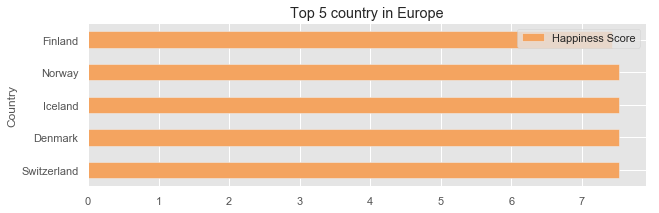

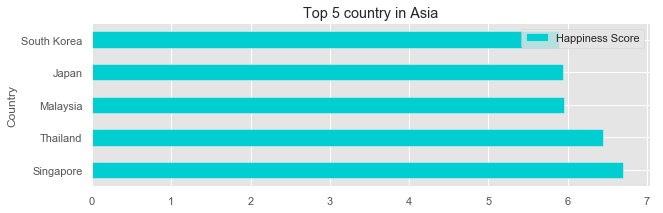

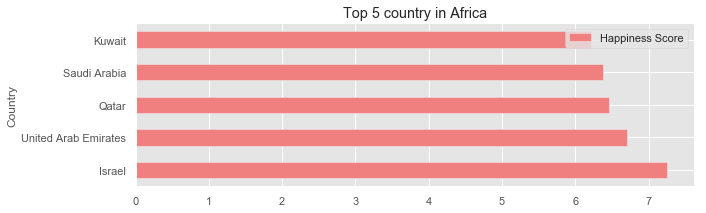

In [145]:
color  = ['sandybrown','darkturquoise','lightcoral','goldenrod']
location=[Europe,Asia,Africa]
for i in range(0,3):
    TopCountry(location[i],color[i])

We also found it is interesting to find out each top 5 happy country in Europe, Asia and Africa, which are shows in above 3 bar chart respectively.

In [54]:
Data=data.rename(columns={'Dystopia Residual': 'Dystopia_Residual'})
df2017 = Data.loc[data['year']==2017].sort_values(by='Happiness Score',ascending=False).iloc[:50, :]

import plotly.graph_objs as go

trace1 = {
  'x': df2017.Country,
  'y': df2017.Economy,
  'name': 'Economy',
  'type': 'bar'
};
trace2 = {
  'x': df2017.Country,
  'y': df2017.Family,
  'name': 'Family',
  'type': 'bar'
};
trace3 = {
  'x': df2017.Country,
  'y': df2017.Health,
  'name': 'Health',
  'type': 'bar'
};
trace4 = {
  'x': df2017.Country,
  'y': df2017.Trust,
  'name': 'Trust',
  'type': 'bar'
};
trace5 = {
  'x': df2017.Country,
  'y': df2017.Generosity,
  'name': 'Generosity',
  'type': 'bar'
};
trace6 = {
  'x': df2017.Country,
  'y': df2017.Freedom,
  'name': 'Freedom',
  'type': 'bar'
};
trace7 = {
  'x': df2017.Country,
  'y': df2017.Dystopia_Residual,
  'name': 'Dystopia Residual',
  'type': 'bar'
};
data3 = [trace1, trace2, trace3, trace4, trace5, trace6, trace7];
layout = {
  'xaxis': {'title': 'Top 50 Countries'},
  'barmode': 'relative',
  'title': 'Top 50 Countries in 2017 According to the Different Parameters'
};
plt.style.use('seaborn-pastel')
fig = go.Figure(data = data3, layout = layout)
iplot(fig)

## Time analysis

In [55]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



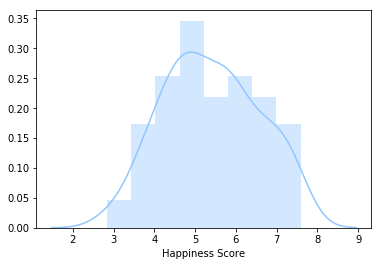

In [56]:
sns.distplot(H2015['Happiness Score'])

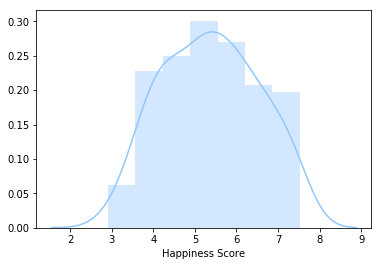

In [57]:
sns.distplot(H2016['Happiness Score'])

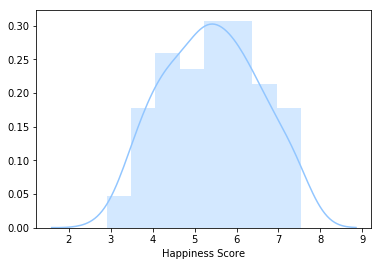

In [58]:
sns.distplot(H2017['Happiness Score'])

In [59]:
data.groupby(['year','Region']).agg({'Happiness Score':'mean'})

Happiness Score
year Region                                          
2015 Australia and New Zealand               7.285000
     Central and Eastern Europe              5.332931
     Eastern Asia                            5.496250
     Latin America and Caribbean             6.138762
     Middle East and Northern Africa         5.330789
     North America                           7.273000
     Southeastern Asia                       5.372625
     Southern Asia                           4.580857
     Sub-Saharan Africa                      4.130788
     Western Europe                          6.689619
2016 Australia and New Zealand               7.323500
     Central and Eastern Europe              5.370690
     Eastern Asia                            5.477000
     Latin America and Caribbean             6.056095
     Middle East and Northern Africa         5.386053
     North America                           7.254000
     Southeastern Asia                       5.396750
     Southern Asia                           4.563286
     Sub-Saharan Africa                      4.070455
     Western Europe                          6.685667
2017 Australia and New Zealand               7.299000
     Central and Eastern Europe              5.409931
     Eastern Asia                            5.496500
     Latin America and Caribbean             5.957905
     Middle East and Northern Africa         5.369684
     North America                           7.154500
     Southeastern Asia                       5.444875
     Southern Asia                           4.628429
     Sub-Saharan Africa                      4.121182
     Western Europe                          6.703714

In [60]:
data_time=data.groupby(['year'])[['Happiness Score']].mean()
data_time

Happiness Score
year                 
2015         5.395890
2016         5.384705
2017         5.394904

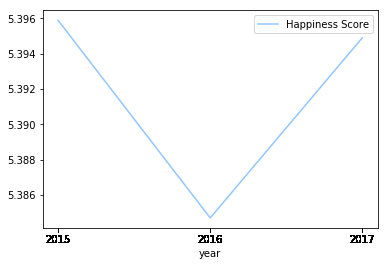

In [61]:
data_time.plot(xticks=(data['year']))

In [62]:
data.groupby(['Country','year'])[['Happiness Score']].mean()

Happiness Score
Country              year                 
Afghanistan          2015            3.575
                     2016            3.360
                     2017            3.794
Albania              2015            4.959
                     2016            4.655
                     2017            4.644
Algeria              2015            5.605
                     2016            6.355
                     2017            5.872
Angola               2015            4.033
                     2016            3.866
                     2017            3.795
Argentina            2015            6.574
                     2016            6.650
                     2017            6.599
Armenia              2015            4.350
                     2016            4.360
                     2017            4.376
Australia            2015            7.284
                     2016            7.313
                     2017            7.284
Austria              2015            7.200
                     2016            7.119
                     2017            7.006
Azerbaijan           2015            5.212
                     2016            5.291
                     2017            5.234
Bahrain              2015            5.960
                     2016            6.218
                     2017            6.087
...                                    ...
United Arab Emirates 2015            6.901
                     2016            6.573
                     2017            6.648
United Kingdom       2015            6.867
                     2016            6.725
                     2017            6.714
United States        2015            7.119
                     2016            7.104
                     2017            6.993
Uruguay              2015            6.485
                     2016            6.545
                     2017            6.454
Uzbekistan           2015            6.003
                     2016            5.987
                     2017            5.971
Venezuela            2015            6.810
                     2016            6.084
                     2017            5.250
Vietnam              2015            5.360
                     2016            5.061
                     2017            5.074
Yemen                2015            4.077
                     2016            3.724
                     2017            3.593
Zambia               2015            5.129
                     2016            4.795
                     2017            4.514
Zimbabwe             2015            4.610
                     2016            4.193
                     2017            3.875

[438 rows x 1 columns]

In [63]:
H2017.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Trust', 'Dystopia Residual',
       'Region', 'year'],
      dtype='object')

## Factor analysis

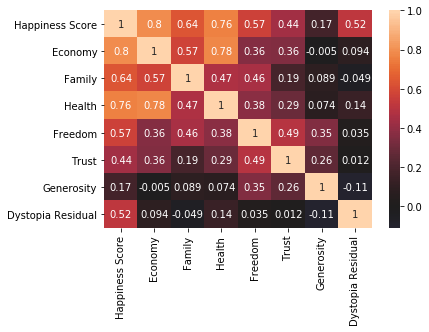

In [64]:
d =data[['Happiness Score',
       'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual']].corr()
sns.heatmap(d,center=0,annot=True)


<Figure size 1440x1440 with 0 Axes>

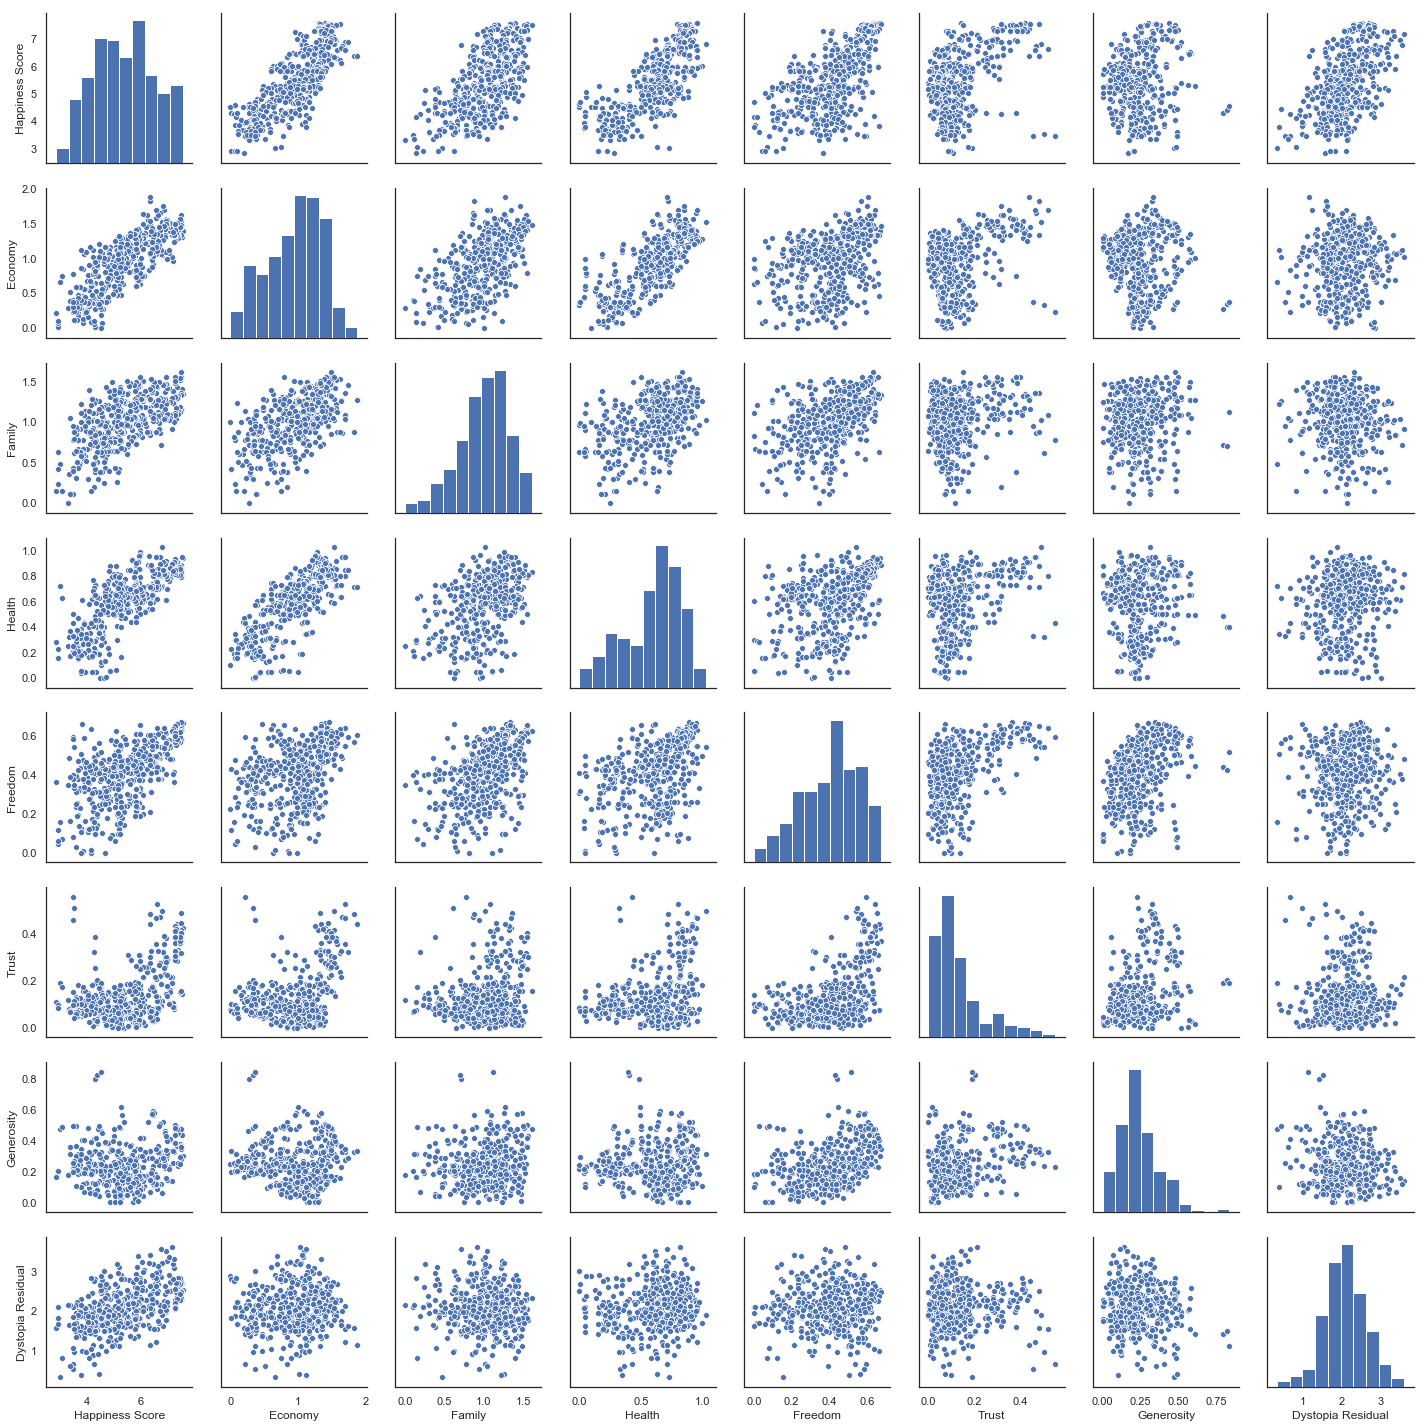

In [65]:
fig = plt.figure(figsize=(20,20))
sns.set(style="white",font_scale=1);
sns.pairplot(data[['Happiness Score','Economy', 'Family', 'Health',
                    'Freedom', 'Trust','Generosity','Dystopia Residual']]);

In [66]:
!pip install bubbly

In [67]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=data, x_column='Happiness Score', y_column='Health', 
    bubble_column='Country',time_column='year',  color_column='Region',
    x_title="Happiness Score", y_title="Health", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=2, width=1000,height=700)

iplot(figure, config={'scrollzoom': True})

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [68]:
figure = bubbleplot(dataset=data, x_column='Happiness Score', y_column='Economy', 
    bubble_column='Country',time_column='year',  color_column='Region',
    x_title="Happiness Score", y_title="Economy", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=2, width=1000,height=700)

iplot(figure, config={'scrollzoom': True})

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [69]:
figure = bubbleplot(dataset=data, x_column='Happiness Score', y_column='Family', 
    bubble_column='Country',time_column='year',  color_column='Region',
    x_title="Happiness Score", y_title="Family", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=2, width=1000,height=700)

iplot(figure, config={'scrollzoom': True})

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:156: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



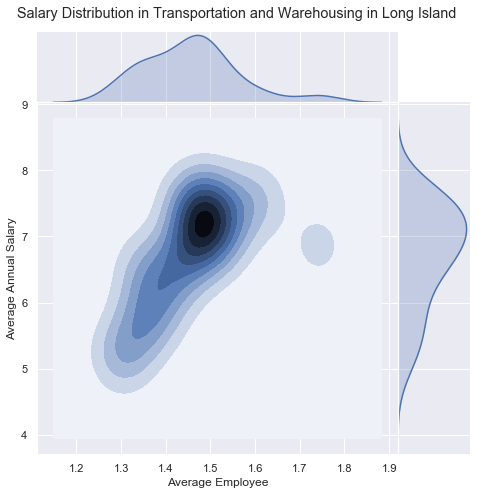

In [70]:
sns.set(font_scale = 1)

data6 = data[(data['Region'] == 'Western Europe')&(data['year']==2017)]

g = sns.jointplot('Economy', 'Happiness Score', kind = "kde", size = 7, space = 0, color = "b", data = data6)
g.set_axis_labels("Average Employee", "Average Annual Salary")
plt.subplots_adjust(top = 0.93)
g.fig.suptitle('Salary Distribution in Transportation and Warehousing in Long Island') 
plt.style.use('ggplot')